In [1]:
import scipy.stats as ss
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
tab0 = Table.read('../Sampling/FullSampleWithLum.fits')
tab1 = Table.read('../LumMatch/LumMatch.fits')

In [2]:
iw3 = tab0['i-w3']
rw3 = tab0['r-w3']
rz = tab0['r-z']
rew = tab0['rew_gf']
kt80 = tab0['kurt80_gf']
fwhm = tab0['fwhm_gf']
frat = tab0['frat_nv/civ']
asy= tab0['asy_gf']
bal = tab0['bal_flag_vi']
iz = iw3 - rw3 + rz
L = tab0['Lum']

In [3]:
# LM sample
iw3_L = tab1['i-w3']
rw3_L = tab1['r-w3']
rz_L = tab1['r-z']
rew_L = tab1['rew_gf']
kt80_L = tab1['kurt80_gf']
fwhm_L = tab1['fwhm_gf']
frat_L = tab1['frat_nv/civ']
asy_L = tab1['asy_gf']
bal_L = tab1['bal_flag_vi']
iz_L = iw3_L - rw3_L + rz_L
L_L = tab1['Lum']

In [4]:
#  ERQ sample
erq0 = iw3>4.6
iw3_erq0 = iw3[erq0]
rew_erq0 = rew[erq0]
kt80_erq0 =  kt80[erq0]
fwhm_erq0 =  fwhm[erq0]
rw3_erq0 = rw3[erq0]
rz_erq0 =  rz[erq0]
frat_erq0 =frat[erq0]
asy_erq0 =  asy[erq0]
L_erq0 =  L[erq0]
iz_erq0 = iw3_erq0 - rw3_erq0 + rz_erq0

In [5]:
#  CERQ sample
erq1 = (iw3>=4.6) & (rew>=100)
iw3_erq1 = iw3[erq1]
rew_erq1 = rew[erq1]
kt80_erq1 =  kt80[erq1]
fwhm_erq1 =  fwhm[erq1]
rw3_erq1 = rw3[erq1]
rz_erq1 =  rz[erq1]
frat_erq1 =frat[erq1]
asy_erq1 =  asy[erq1]
L_erq1 =  L[erq1]
iz_erq1 = iw3_erq1 - rw3_erq1 + rz_erq1

In [6]:
(np.median(np.log10(rew_erq1)) -np.median(np.log10(rew_L)))/np.std(np.log10(rew_L))

3.125440153687955

In [7]:
(np.median(np.log10(iw3_erq1)) -np.median(np.log10(iw3_L)))/np.std(np.log10(iw3_L))

3.6391324621714176

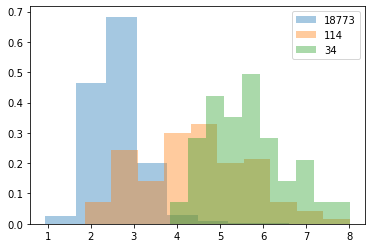

In [8]:
mask1= (rew>30) &  (frat>0) & (kt80>0.2)
mask2=(rew>80) & (frat>1.2) & (kt80>0.25)
mask3=(rew>100) &  (frat>1.5) & (kt80>0.33)
plt.hist(iw3[mask1], bins=10, density=True, alpha=0.4, label=str(np.sum(mask1)))
plt.hist(iw3[mask2], bins=10, density=True, alpha=0.4, label=str(np.sum(mask2)))
plt.hist(iw3[mask3], bins=10, density=True, alpha=0.4, label=str(np.sum(mask3)))
plt.legend()
plt.show()

In [9]:
import itertools
l=np.arange(8)
c=list(itertools.combinations(l,2))
c=np.array(c)
print(c)

[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 7]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [4 5]
 [4 6]
 [4 7]
 [5 6]
 [5 7]
 [6 7]]


In [10]:
CC = np.array(list(zip(iw3, rew, kt80, fwhm, frat, iz,  asy, L)))
CC_L = np.array(list(zip(iw3_L, rew_L, kt80_L, fwhm_L, frat_L, iz_L,  asy_L, L_L)))
CC_erq0 = np.array(list(zip(iw3_erq0, rew_erq0, kt80_erq0, fwhm_erq0,\
                            frat_erq0, iz_erq0,   asy_erq0, L_erq0)))
CC_erq1 = np.array(list(zip(iw3_erq1, rew_erq1, kt80_erq1, fwhm_erq1,
                            frat_erq1, iz_erq1,   asy_erq1, L_erq1)))
name=['iw3', 'rew', 'kt80', 'fwhm', 'frat', 'iz',  'asy', 'L']

In [11]:
r_L=[]; p_L=[]
r=[]; p=[]
r_erq0=[]; p_erq0=[]
r_erq1=[]; p_erq1=[]
for comb in range(len(c)):
    r_L.append(0); p_L.append(0)
    r_L[comb], p_L[comb] = ss.kendalltau(CC_L[:,c[comb][0]], CC_L[:,c[comb][1]])
    
    r.append(0); p.append(0)
    r[comb], p[comb] = ss.kendalltau(CC[:,c[comb][0]], CC[:,c[comb][1]])
    
    r_erq0.append(0); p_erq0.append(0)
    r_erq0[comb], p_erq0[comb] = ss.kendalltau(CC_erq0[:,c[comb][0]], CC_erq0[:,c[comb][1]])
    
    r_erq1.append(0); p_erq1.append(0)
    r_erq1[comb], p_erq1[comb] = ss.kendalltau(CC_erq1[:,c[comb][0]], CC_erq1[:,c[comb][1]])

In [12]:
# import matplotlib.pypl

f=open('kendal-correlations.txt', 'w')
for i in range(len(c)):
    if (p_erq1[i]<=1):
        f.write("Corr(%s,%s):\t%.2f\t%.2f\t%.2f\t%.2f\n " %(name[c[i][0]], 
                name[c[i][1]],r[i], r_L[i], r_erq0[i],r_erq1[i]))
        f.write("P-Value(%s,%s):\t%.2f\t%.2f\t%.2f\t%.2f\n " %(name[c[i][0]], 
                name[c[i][1]], p[i], p_L[i], p_erq0[i],p_erq1[i]))
    f.write("\n")
f.close()


In [13]:
g=open('stat.txt', 'w')
for c in range(8):
    g.write("%s %.2f %.2f  | %.2f (%.2f) | %.2f (%.2f) | %.2f (%.2f)\n" %(name[c], 
        np.median(CC[:,c]), np.std(CC[:,c]), \
        np.median(CC_L[:,c]), np.std(CC_L[:,c]), \
        np.median(CC_erq0[:,c]),np.std(CC_erq0[:,c]),\
        np.median(CC_erq1[:,c]), np.std(CC_erq1[:,c])))
g.close()

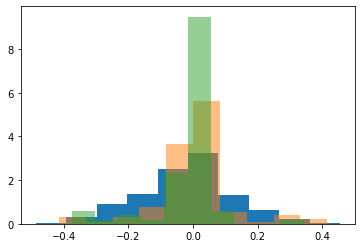

In [14]:
plt.hist(asy_L, density=True)
plt.hist(asy[erq0], density=True, alpha=0.5)
plt.hist(asy[erq1], density=True, alpha=0.5)
plt.show()

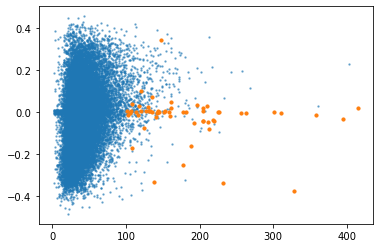

In [15]:
# %matplotlib
# mask=((asy<0.01) & (asy>-.01))
plt.scatter(rew_L, asy_L, alpha=0.5, s=2)
erq_nobal = (iw3>=4.6) & (rew>=100) & (bal==0)
plt.scatter(rew[erq_nobal], asy[erq_nobal], s=10)
plt.show()

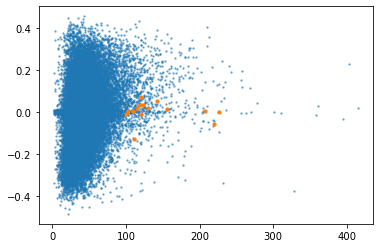

In [16]:
plt.scatter(rew, asy, alpha=0.5, s=2)
erq_bal= (iw3>4.6) & (rew>100) & (bal==1)
plt.scatter(rew[erq_bal], asy[erq_bal], s=10)
plt.show()

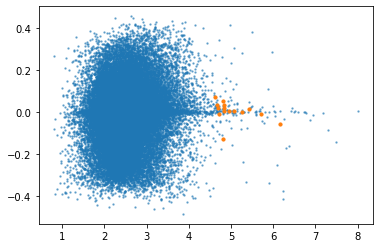

In [17]:
plt.scatter(iw3, asy, alpha=0.5, s=2)
plt.scatter(iw3[erq_bal], asy[erq_bal], s=10)
plt.show()

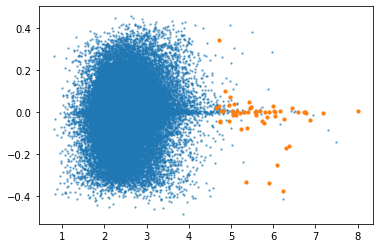

In [18]:
plt.scatter(iw3, asy, alpha=0.5, s=2)
plt.scatter(iw3[erq_nobal], asy[erq_nobal], s=10)
plt.show()

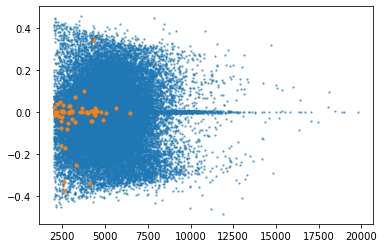

In [19]:
plt.scatter(fwhm, asy, alpha=0.5, s=2)
plt.scatter(fwhm[erq_nobal], asy[erq_nobal], s=10)
plt.show()

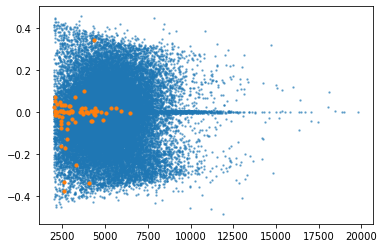

In [20]:
plt.scatter(fwhm, asy, alpha=0.5, s=2)
plt.scatter(fwhm[erq1], asy[erq1], s=10)
plt.show()

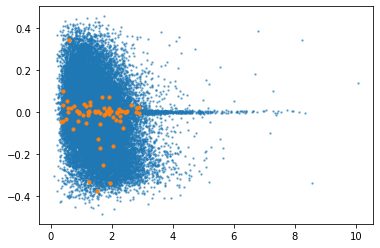

In [21]:




plt.scatter(frat[frat>0], asy[frat>0], alpha=0.5, s=2)
plt.scatter(frat[erq1], asy[erq1], s=10)
plt.show()

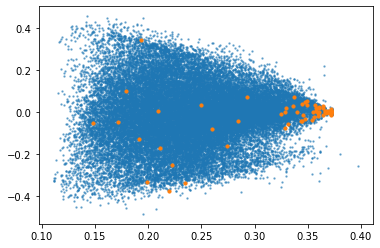

In [22]:
plt.scatter(kt80, asy, alpha=0.5, s=2)
plt.scatter(kt80[erq1], asy[erq1], s=10)
plt.show()

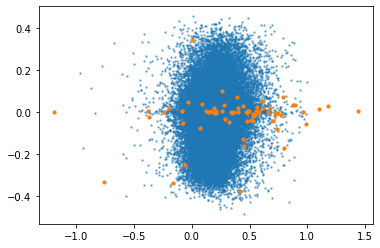

In [23]:
plt.scatter(iz[(-1<iz) & (iz<1)], asy[(-1<iz) & (iz<1)], alpha=0.5, s=2)
plt.scatter(iz[erq1], asy[erq1], s=10)
plt.show()

3.0
495


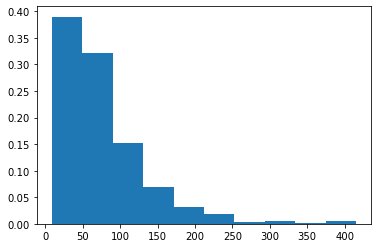

In [24]:
mask = iw3>4
x= rew[mask]
p,bins, patches = plt.hist(x)
print(p[-1])
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

297


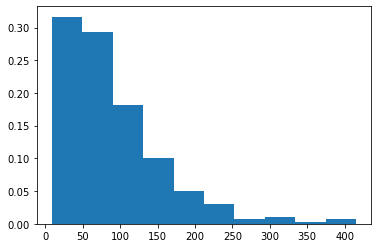

In [25]:
mask = iw3>4.2
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

216


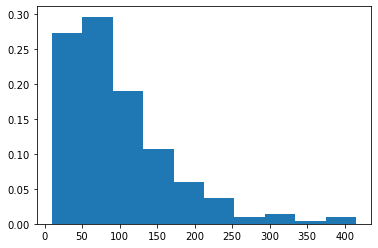

In [26]:
mask = iw3>4.4
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

154


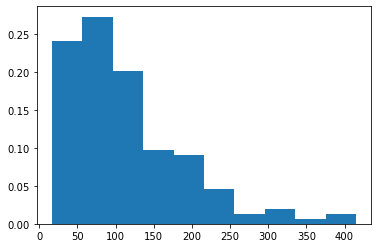

In [27]:
mask = iw3>4.6
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

110


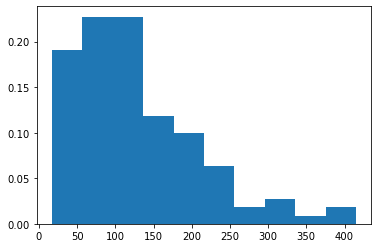

In [28]:
mask = iw3>4.8
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

82


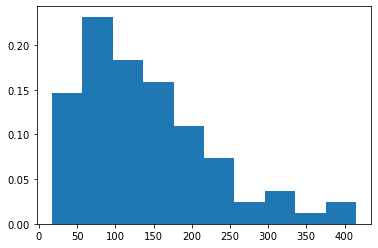

In [29]:
mask = iw3>5
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

In [30]:
(4.6 - np.mean(iw3))/np.std(iw3)

3.727682472047995

In [31]:
(100 - np.mean(rew))/np.std(rew)

2.6117430564826427

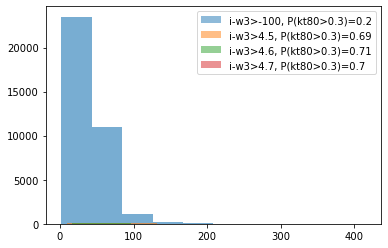

In [32]:
plt.clf()
for c in [-100, 4.5, 4.6, 4.7]:
    mask = iw3>c
    x= rew[mask]
    p,bins, patches = plt.hist(x, alpha=0.6)
    pdf=p/sum(p)
  
    med_bin = (bins[:-1] + bins[1:])/2
    width = bins[1] - bins[0]
    plt.bar(med_bin, pdf, width, label='i-w3>'+str(c) + ', P(kt80>0.3)=' + str(round(sum(kt80[mask]>0.3)/sum(mask),2)), alpha=0.5)
plt.legend()

plt.show()
    

mask = 

<Figure size 432x288 with 0 Axes>

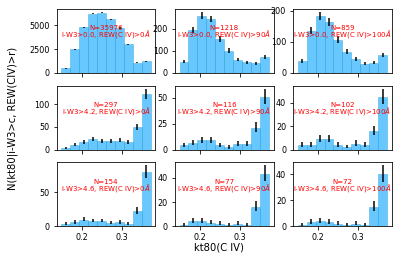

In [72]:
pdf=np.zeros([4,4,10])
ErrLowpdf=np.zeros([4,4,10])
ErrUppdf=np.zeros([4,4,10])
i=-1
# R0 = [0,]
R = [-100, np.log10(90),2]
C = [0, 4.2, 4.6]
for c in C:
    i+=1
    j=-1
    for r in R:
        j+=1
        mask = (iw3>c) & (np.log10(rew)>r)
        x = kt80[mask]
        p, bins, patches = plt.hist(x, alpha=0.6, bins=10)
        pdf[i,j,:] =p
        for  k in range(10):
            ErrLowpdf[i,j,k] = -0.5 + np.sqrt(p[k]+0.25) #(np.std(x[(x>=bins[k]) & (x<=bins[k+1])]))
            ErrUppdf[i,j,k] = 0.5 + np.sqrt(p[k]+0.25) #(np.std(x[(x>=bins[k]) & (x<=bins[k+1])]))

  
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.clf()
fig, axes = plt.subplots(sharex=True, sharey=False, ncols=3, nrows=3)
i=-1
for c in C:
    i+=1
    j=-1
    for r in R:
        j+=1
#         if i<j:
#             axes[i,j].axis('off')
#         else:

#         axes[i,j].bar(med_bin, pdf[i,j,:], width, alpha=0.6, color='green')
#         axes[i,j].bar(med_bin, pdf[i,j,:], width=width, yerr= Errpdf[i,j,:],  color='red')
#         title = 'i-W3>'+str(c) +' REW>'+str() +r'$\AA$ #'+str()
        axes[i,j].bar(med_bin, pdf[i,j,:], width=width,  facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5, 
                      yerr=[ErrLowpdf[i,j,:], ErrUppdf[i,j,:]],  alpha=.71, label=title)
#         axes[i,j].set_title(title, fontsize=5, color='blue')
        title = r'i-W3>%.1f, REW(C IV)>%d$\AA$'%(c, np.round(10**r))

        axes[i,j].text(0.5, 0.6, title, horizontalalignment='center',
          verticalalignment='center', transform=axes[i,j].transAxes, fontsize=7, color='red')

        title = 'N=%d'%(sum((iw3>c)&(np.log10(rew)>r)))
        axes[i,j].text(0.5, 0.7, title, horizontalalignment='center',
          verticalalignment='center', transform=axes[i,j].transAxes, fontsize=7, color='red')
#       
    #         axes[i,j].rc('xtick', labelsize=7)   # fontsize of the tick labels

#         axes[i,j].set_xlabel(title)
#         axes[i,j].set_ylabel('Population')
#         plt.savefig('iw3>'+str(c)+'rew>'+str(int(10**r))+'.png', dpi=400) 
#         plt.show()
fig.text(0.01, 0.5, 'N(kt80|i-W3>c, REW(CIV)>r)', rotation='vertical', va='center')
fig.text(0.5, 0.04, 'kt80(C IV)', ha='center')
# axes.set_ylabel('ratio')
# plt.ylim(0,0.61)

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.savefig('rew-color-dist.png', dpi=200, bbox_inches='tight')
plt.show()

In [73]:
! cp rew-color-dist.png ../../erqPaper/fig

In [54]:
10**np.log10(90)

89.99999999999997